# We will build RNN for Stocks/Crypto price tracking

In [20]:
import json
import os

import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
import yfinance as yf

In [16]:
hdfc = yf.download(tickers=["HDFCBANK.NS"], start="2022-01-02", interval='1d')
hdfc

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,
2022-01-03,1465.145264,1468.375087,1427.399420,1431.738020,4534592
2022-01-04,1473.726074,1477.920031,1453.720307,1465.482687,4428676
2022-01-05,1508.724121,1515.617698,1473.292219,1481.680250,7166319
2022-01-06,1484.524292,1498.986292,1475.172246,1487.657725,4814465
2022-01-07,1494.937012,1510.555925,1480.812435,1488.621891,5589692
...,...,...,...,...,...
2025-05-20,1914.900024,1934.599976,1913.000000,1928.099976,11939545
2025-05-21,1926.800049,1946.900024,1921.099976,1927.000000,7566020


In [19]:
df = hdfc[['Close', 'Volume']]
df

Price,Close,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS
Date,,
2022-01-03,1465.145264,4534592
2022-01-04,1473.726074,4428676
2022-01-05,1508.724121,7166319
2022-01-06,1484.524292,4814465
2022-01-07,1494.937012,5589692
...,...,...
2025-05-20,1914.900024,11939545
2025-05-21,1926.800049,7566020


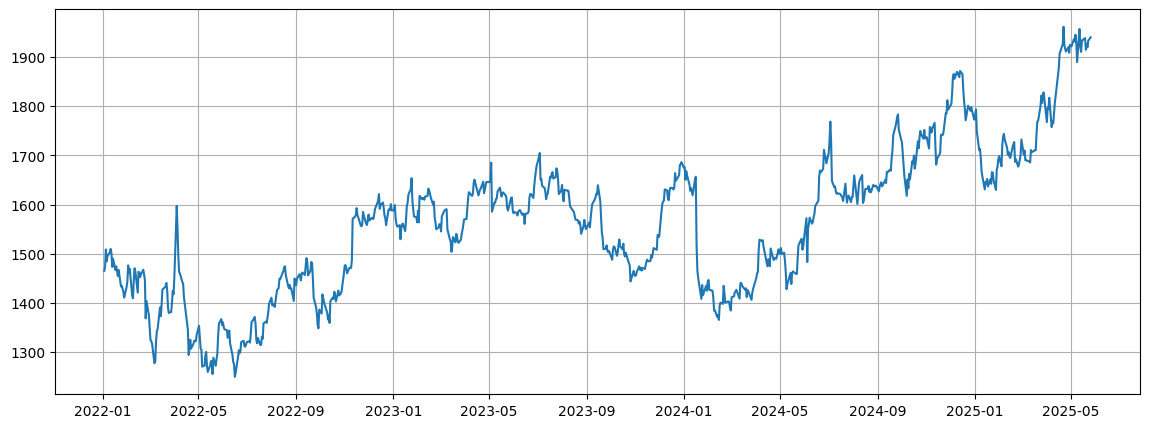

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'])

plt.grid('on')
plt.show()

In [25]:
df['5d_MA'] = df['Close'].rolling(5).mean()
df['10d_MA'] = df['Close'].rolling(10).mean()
df['20d_MA'] = df['Close'].rolling(20).mean()
df['50d_MA'] = df['Close'].rolling(50).mean()

df

Price,Close,Volume,5d_MA,10d_MA,20d_MA,50d_MA
Ticker,HDFCBANK.NS,HDFCBANK.NS,,,,
Date,,,,,,
2022-01-03,1465.145264,4534592,NaN,NaN,NaN,NaN
2022-01-04,1473.726074,4428676,NaN,NaN,NaN,NaN
2022-01-05,1508.724121,7166319,NaN,NaN,NaN,NaN
2022-01-06,1484.524292,4814465,NaN,NaN,NaN,NaN
2022-01-07,1494.937012,5589692,1485.411353,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-05-20,1914.900024,11939545,1926.539990,1927.629980,1926.714990,1834.864993
2025-05-21,1926.800049,7566020,1929.780005,1925.749988,1924.969995,1839.200994


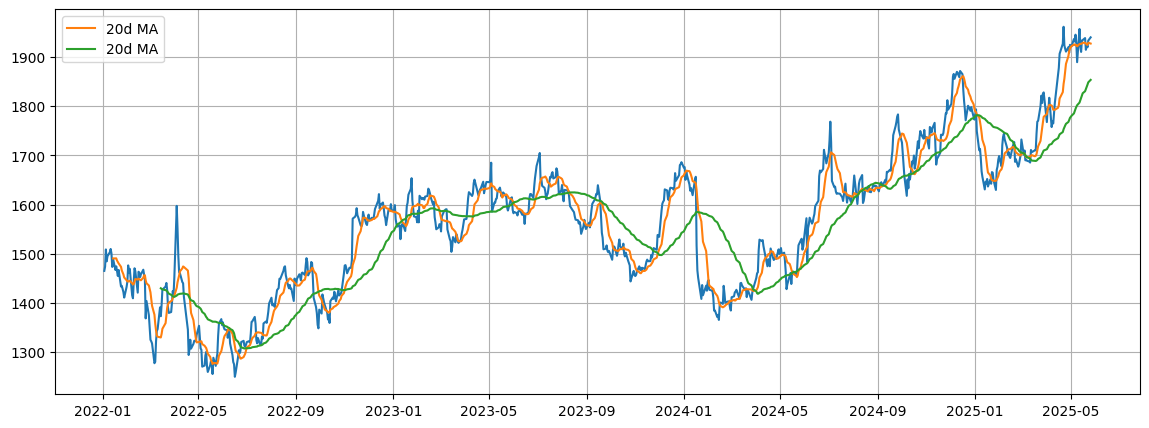

In [33]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'])
plt.plot(df['10d_MA'], label='20d MA')
plt.plot(df['50d_MA'], label='20d MA')

plt.grid('on')
plt.legend()
plt.show()